In [8]:
import pandas as pd
import numpy as np
import glob
import os
import seaborn as sns
import scipy.stats as stats

In [5]:
# Helper functions

def extract_between(text, sub1, sub2):
    """Return a string between two substrings"""
    start = text.find(sub1)
    if start != -1:
        start += len(sub1)
        end = text.find(sub2, start)
        if end != -1:
            return text[start:end].strip()
        
def get_sign(n):
    """Returns the sign of a numeric value; rough"""
    return -1 if n < 0 else 1

# def get_reversal(input_array):
#     """Returns an array of numbers where if not a reversal return 0 or 
#     a positive number counting the number of reversals
#     (This is how it is counted according to https://courses.washington.edu/matlab1/Lesson_4.html)"""
#     diffs = np.diff(input_array)
#     diffs = np.append(diffs, 0)
    
#     output = np.zeros(diffs.size)
#     count_rev = 0
    
#     for i in range(len(diffs)):
#         if(diffs[i]>0):
#             count_rev = count_rev + 1
#             output[i] = count_rev
#     return(output)


# This version labels decrement as a reversal
# this is the correct reversal label
def get_reversal(input_array):
    diffs = np.diff(input_array)
    diffs = np.append(diffs, 0)
    
    output = np.zeros(diffs.size)
    track_rev = 0
    first_rev_switch = 0
    count_rev = 0
    
    for i in range(len(diffs)):
        if(diffs[i]!=0 and first_rev_switch==0):
            first_rev_switch = 1
            track_rev = get_sign(diffs[i])
        elif(diffs[i]!=0):
            temp_diff_dir = get_sign(diffs[i])
            if(track_rev != temp_diff_dir):
                track_rev = temp_diff_dir
                count_rev = count_rev + 1
                output[i] = count_rev
    return(output)

In [6]:
# make an array of directories to the desired data.
# Change this to the folder where the data is located
files_list = glob.glob("../../pilot_test_data/061424_testPilotData/*.txt")

# initialize a dataframe
df = pd.DataFrame()

In [6]:
# read each data and format them to a dataframe
for file in files_list:
    uid = extract_between(file, "Data\\", "_3d")
    condition = extract_between(file, "1u_", ".txt")
    
    temp_df = pd.read_table(file, sep='\\s+')
    
    temp_df["trialNumber"] = np.arange(len(temp_df)) + 1
    temp_df["uid"] = uid
    temp_df["condition"] = condition
    temp_df["Reversal"] = get_reversal(temp_df["Separation"])
    temp_df["isReversal"] = np.where(temp_df["Reversal"]==0, False, True)
    temp_df['isCorrect'] = np.where(temp_df["Direction"]==temp_df["Recorded_Direction"], 1, 0)
    temp_df["color"] = np.where(temp_df["Reversal"]!=0, 'red', 'black')

    df = pd.concat([df, temp_df], ignore_index=True)
    
df

""


In [7]:
plt1 = sns.FacetGrid(df, col="uid", row="condition")
plt1.map_dataframe(sns.scatterplot, x="trialNumber", y="Separation", hue="isReversal")
plt1.map_dataframe(sns.lineplot, x="trialNumber", y="Separation")

KeyError: 'condition'

In [6]:
dfsumm = df[(df.isReversal==True) & (df.Reversal>2.0)]
# print(dfsumm)

dfsumm2 = dfsumm.groupby(["uid","condition"], as_index=False).agg({'Separation': 'mean'})

dfsumm2 = dfsumm2.pivot(index='uid', columns='condition', values='Separation')

print(dfsumm2)
print(stats.ttest_rel(dfsumm2['eyesclosed'], dfsumm2['eyesopen']))
print(stats.ttest_rel(dfsumm2['eyesclosed'], dfsumm2['eyesopen'], alternative='less'))

print(stats.wilcoxon(dfsumm2['eyesclosed'], dfsumm2['eyesopen']))
print(stats.wilcoxon(dfsumm2['eyesclosed'], dfsumm2['eyesopen'], alternative='less'))

condition  eyesclosed  eyesopen
uid                            
anjelica     2.000000  1.571429
dr           1.571429  2.400000
hao          1.857143  2.000000
puru         2.142857  2.000000
sj           2.000000  3.142857
TtestResult(statistic=-1.0458362411777669, pvalue=0.3546704322306675, df=4)
TtestResult(statistic=-1.0458362411777669, pvalue=0.17733521611533376, df=4)
WilcoxonResult(statistic=4.5, pvalue=0.4375)
WilcoxonResult(statistic=4.5, pvalue=0.21875)


In [7]:
# get percent correct and trial counts for each separation
df2 = df.groupby(["uid","condition","Separation"], as_index=False).agg({'isCorrect': 'mean', 'trialNumber':'count'})
df2

,uid,condition,Separation,isCorrect,trialNumber
0,anjelica,eyesclosed,1.0,0.777778,18
1,anjelica,eyesclosed,2.0,0.812500,16
2,anjelica,eyesclosed,3.0,0.923077,13
3,anjelica,eyesclosed,4.0,1.000000,6
4,anjelica,eyesclosed,7.0,1.000000,3
5,anjelica,eyesclosed,10.0,1.000000,3
6,anjelica,eyesopen,1.0,0.777778,18
7,anjelica,eyesopen,2.0,0.823529,17
8,anjelica,eyesopen,3.0,1.000000,12
9,anjelica,eyesopen,4.0,1.000000,3


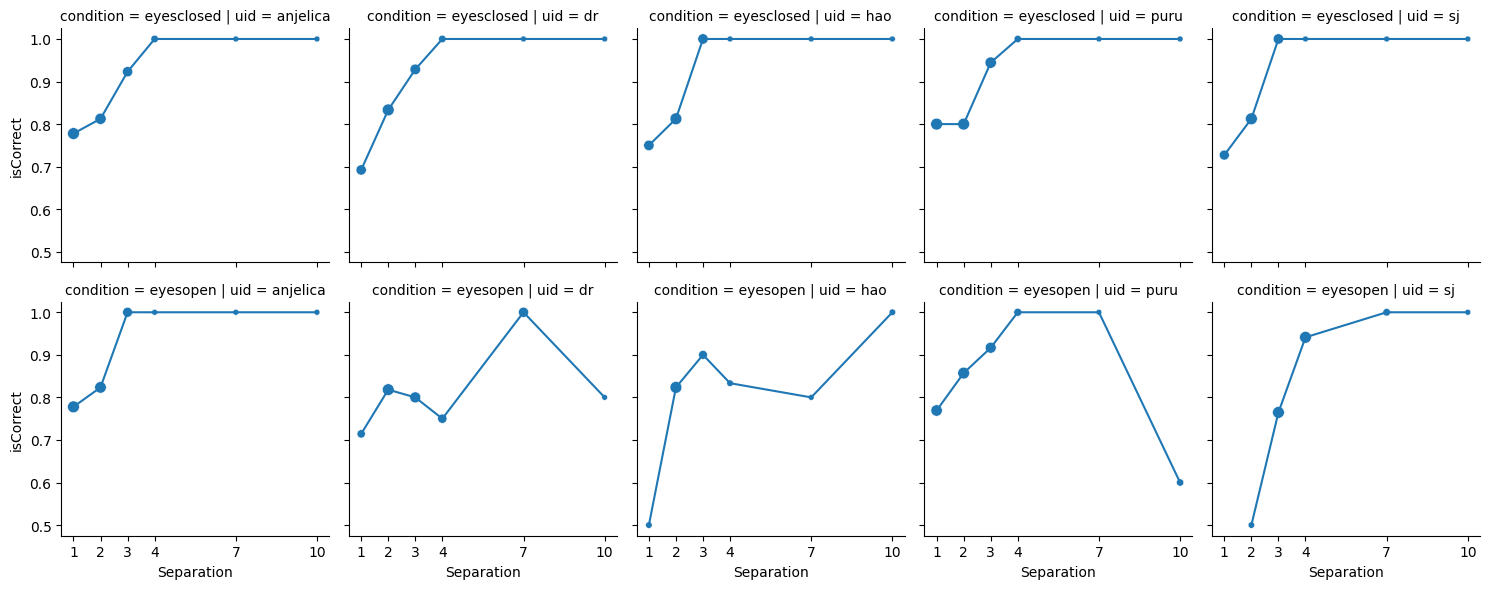

In [8]:
# plot percent correct scaled by number or correct trials
plt2 = sns.FacetGrid(df2, col="uid", row="condition")
plt2.map_dataframe(sns.scatterplot, x="Separation", y="isCorrect", size="trialNumber")
plt2.map_dataframe(sns.lineplot, x="Separation", y="isCorrect")
plt2.set(xticks=[1,2,3,4,7,10])
# plt2.set_xticklabels([1,2,3,4,7,10])
